<hr style="height:2px; background-color: black;">
<div style="text-align: left; display: inline-block; width: 50%;">Vincent Earl Andrews</div><div style="text-align: right; display: inline-block; width: 50%;"></div>                                           
                                                  
<h3 align="center">Cosmology Project 1: Hubble Law</h3>
<hr style="height:2px; background-color: black;">

Goals with Edits:

- Make text on all plots bigger

- Change colors for plots to look better

- Check OLS X|Y 

- Validate mean distance usage with some distribution thing

- Include errors in fitting methods

- remove titles

In [44]:
# general use 
import pandas as pd
import numpy as np
import math
import statistics as stat

# plotting / visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# getting data from NED astrophysical database
from astroquery.ipac.ned import Ned

# packages for fitting
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [36]:
# getting all distance values for some sources
SMC_distances =  pd.read_csv("C:/Users/vince/Downloads/SMC_distances.csv")
LMC_distances =  pd.read_csv("C:/Users/vince/Downloads/LMC_distances.csv")
NGC4151_distances =  pd.read_csv("C:/Users/vince/Downloads/NGC4151_distances.csv")
NGC4382_distances =  pd.read_csv("C:/Users/vince/Downloads/NGC4382_distances.csv")

SMC_vals = SMC_distances["Distance"].tolist()
LMC_vals = LMC_distances["Distance"].tolist()
NGC4151_vals = NGC4151_distances["Distance"].tolist()
NGC4382_vals = NGC4382_distances["Distance"].tolist()

In [46]:
# calculating statistics
def STAT(VALS):
    '''
    Calculates mean and median for each list
    '''
    MEAN = stat.mean(VALS)
    MEDIAN = stat.median(VALS)
    STDEV = stat.stdev(VALS)
    
    return MEAN, MEDIAN, STDEV

SMC_mean, SMC_median, SMC_stdev = STAT(SMC_vals)
LMC_mean, LMC_median, LMC_stdev = STAT(LMC_vals)
NGC4151_mean, NGC4151_median, NGC4151_stdev = STAT(NGC4151_vals)
NGC4382_mean, NGC4382_median, NGC4382_stdev = STAT(NGC4382_vals)

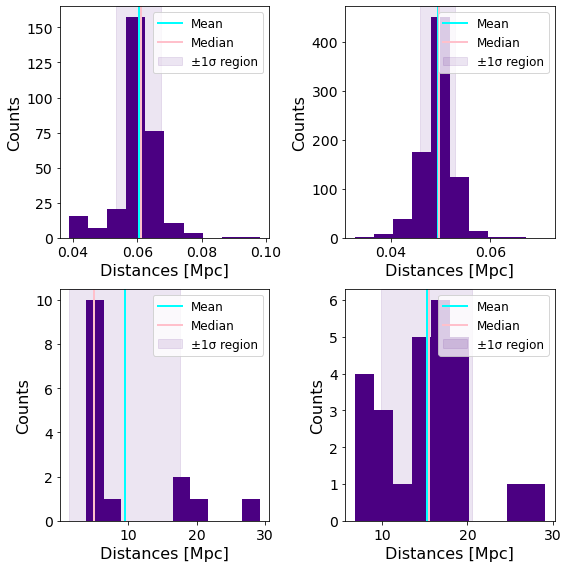

<Figure size 432x288 with 0 Axes>

In [70]:
# plotting histograms of distances
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# SMC
axes[0, 0].hist(SMC_vals, color = 'indigo')
axes[0, 0].axvline(x=SMC_mean, color='cyan', linewidth=2, label='Mean')
axes[0, 0].axvline(x=SMC_median, color='pink', linewidth=2, label='Median')
axes[0, 0].axvspan(SMC_mean - SMC_stdev, SMC_mean + SMC_stdev, color='indigo', alpha=0.1, label='±1σ region')

# LMC
axes[0, 1].hist(LMC_vals, color = 'indigo')
axes[0, 1].axvline(x=LMC_mean, color='cyan', linewidth=2, label='Mean')
axes[0, 1].axvline(x=LMC_median, color='pink', linewidth=2, label='Median')
axes[0, 1].axvspan(LMC_mean - LMC_stdev, LMC_mean + LMC_stdev, color='indigo', alpha=0.1, label='±1σ region')

# NGC4151
axes[1, 0].hist(NGC4151_vals, color = 'indigo')
axes[1, 0].axvline(x=NGC4151_mean, color='cyan', linewidth=2, label='Mean')
axes[1, 0].axvline(x=NGC4151_median, color='pink', linewidth=2, label='Median')
axes[1, 0].axvspan(NGC4151_mean - NGC4151_stdev, NGC4151_mean + NGC4151_stdev, color='indigo', alpha=0.1, label='±1σ region')

# NGC4382
axes[1, 1].hist(NGC4382_vals, color = 'indigo')
axes[1, 1].axvline(x=NGC4382_mean, color='cyan', linewidth=2, label='Mean')
axes[1, 1].axvline(x=NGC4382_median, color='pink', linewidth=2, label='Median')
axes[1, 1].axvspan(NGC4382_mean - NGC4382_stdev, NGC4382_mean + NGC4382_stdev, color='indigo', alpha=0.1, label='±1σ region')

# Common labels and tick stuff
for ax in axes.flat:
    ax.set_xlabel("Distances [Mpc]", fontsize =f2)
    ax.set_ylabel("Counts", fontsize = f2)
    ax.legend(fontsize=f3)
    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

# Save figure
plt.savefig("C:/Users/vince/Downloads/Hubble_histogram.png")

Importing Hubble data from a csv file for the 24 sources in Hubble's original paper. Data is copied from NED for the heliocnetric and CMB velocities, as well as the mean distance.

In [2]:
# create a dataframe of targets originally from the Hubble paper
Hubble_targets_df = pd.read_csv("C:/Users/vince/Downloads/Hubble_data3 - Sheet1.csv")
Hubble_objects = Hubble_targets_df["Object Name"].tolist()

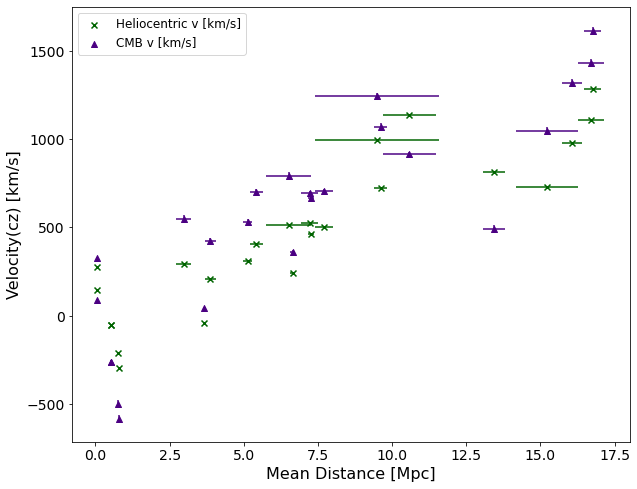

In [67]:
# try plotting Hubble data
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=14)
fig.set_size_inches(10,8)

# define x/y and errors from df
mean_distance = np.array(Hubble_targets_df["d [Mpc]"])
mean_distance_err = Hubble_targets_df["d_err [Mpc]"].tolist()

# getting heliocentric and CMB velocities
cz_helio = Hubble_targets_df["v(Helio) [km/s]"].tolist()
cz_helio_err = Hubble_targets_df["v_err(Helio) [km/s]"].tolist()

cz_CMB = Hubble_targets_df["v(CMB) [km/s]"].tolist()
cz_CMB_err = Hubble_targets_df["v_err(CMB) [km/s]"].tolist()

# create scatter plot and add errors
f1=20 # fontsize
f2=16
f3=12
#ax.set_title("Original Hubble Targets", fontsize = f1)
m1 = 'x'
m2 = '^'
ax.scatter(mean_distance, cz_helio, color = 'darkgreen', label = 'Heliocentric v [km/s]', marker = m1)
ax.scatter(mean_distance, cz_CMB, color = 'indigo', label = 'CMB v [km/s]', marker = m2)
ax.set_xlabel("Mean Distance [Mpc]", fontsize = f2)
ax.set_ylabel("Velocity(cz) [km/s]", fontsize = f2)

# add error bars
ax.errorbar(mean_distance, cz_helio, xerr = mean_distance_err, yerr = cz_helio_err, color = 'darkgreen', linestyle = '')
ax.errorbar(mean_distance, cz_CMB, xerr = mean_distance_err, yerr = cz_CMB_err, color = 'indigo', linestyle = '')
ax.legend(fontsize=f3)

# Save figure
plt.savefig("C:/Users/vince/Downloads/Hubble_scatter.png")

Method 1: Perform Ordinary Least Squares (OLS) Regression - this is the most basic line fitting model that can give an idea of what might need to be adjusted in the methodology used.

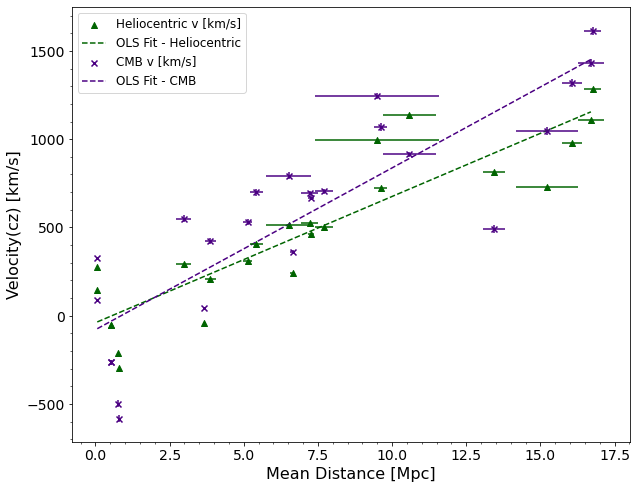

In [68]:
# Fit OLS (ordinary least squares) model
ols_helio = LinearRegression()
ols_CMB = LinearRegression()

# fit for heliocentric
ols_helio.fit(mean_distance.reshape(-1,1), cz_helio)
pred_ols_helio = ols_helio.predict(mean_distance.reshape(-1,1))

# fit for CMB
ols_CMB.fit(mean_distance.reshape(-1,1), cz_CMB)
pred_ols_CMB = ols_CMB.predict(mean_distance.reshape(-1,1))

# plot OLS results
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=14)
fig.set_size_inches(10,8)

ax.scatter(mean_distance, cz_helio, color = 'darkgreen', label = 'Heliocentric v [km/s]', marker = m2)
ax.plot([mean_distance[0], mean_distance[-1]], [pred_ols_helio[0], pred_ols_helio[-1]], color = 'darkgreen', label = 'OLS Fit - Heliocentric', alpha = 1, ls='--')

ax.scatter(mean_distance, cz_CMB, color = 'indigo', label = 'CMB v [km/s]', marker = m1)
ax.plot([mean_distance[0], mean_distance[-1]], [pred_ols_CMB[0], pred_ols_CMB[-1]], color = 'indigo', label = 'OLS Fit - CMB', alpha = 1, ls= '--')

#ax.set_title("OLS Regression for Hubble Sources", fontsize = f1)
ax.set_xlabel("Mean Distance [Mpc]", fontsize = f2)
ax.set_ylabel("Velocity(cz) [km/s]", fontsize = f2)

# add error bars
ax.errorbar(mean_distance, cz_helio, xerr = mean_distance_err, yerr = cz_helio_err, color = 'darkgreen', linestyle = '')
ax.errorbar(mean_distance, cz_CMB, xerr = mean_distance_err, yerr = cz_CMB_err, color = 'indigo', linestyle = '')
ax.legend(fontsize=f3)
ax.minorticks_on()

# get slope results for hubble constant
H0_ols_helio = ols_helio.coef_[0]
H0_ols_CMB = ols_CMB.coef_[0]

# function for computing standard error of regression slope
def standard_err(x, y, y_pred):
    '''
    x: is the mean_distance in Mpc
    y: is the heliocentric velocity (cz) in km/s
    y_pred: is the predicted values for y from the ols model 
    '''
    # get residual in y 
    residuals = y - y_pred

    # Residual variance (standard error of regression)
    n = len(x)
    s = np.sqrt(np.sum(residuals**2)/(n))

    # Standard error of slope
    x_mean = np.mean(x)
    error = s / np.sqrt(np.sum((x.flatten() - x_mean) ** 2))
    
    return error

# get standard error
slope_err_helio = standard_err(mean_distance, cz_helio, pred_ols_helio)
slope_err_CMB = standard_err(mean_distance, cz_CMB, pred_ols_CMB)

# Save figure
plt.savefig("C:/Users/vince/Downloads/Hubble_OLS.png")

In [23]:
print("The Hubble constant using Ordinary Least Squares is:",H0_ols_helio, "km/s/Mpc")
print("The error in the ols model is:", slope_err_helio)

print("The Hubble constant using Ordinary Least Squares is:",H0_ols_CMB, "km/s/Mpc")
print("The error in the ols model is:", slope_err_CMB)

The Hubble constant using Ordinary Least Squares is: 71.49610385274562 km/s/Mpc
The error in the ols model is: 7.195654949016221
The Hubble constant using Ordinary Least Squares is: 91.62931918818367 km/s/Mpc
The error in the ols model is: 11.134238377531023


Method 2: Robust Regression with M-Estimators: M-Estimators can be used to reduce the influence of outliers in a dataset. Since we see some targets far off from the fit that also have large errors, M-Estimators might help get a more accurate calculation. 

Slope for heliocentric = 66.927 ± 4.488
Slope for CMB = 86.161 ± 7.065


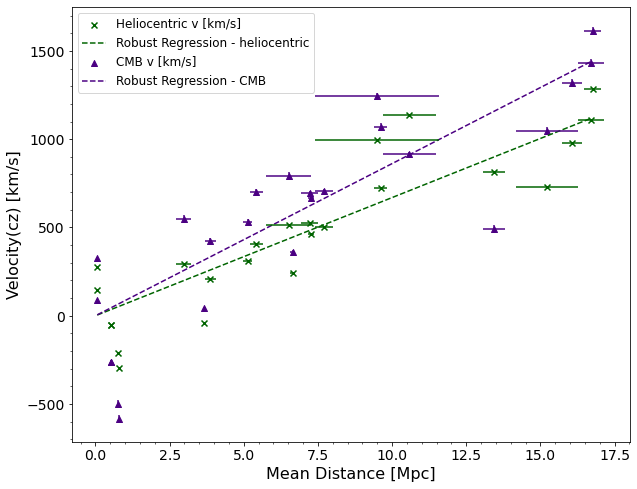

In [69]:
# regression models usually only give slope - adding constant gives  intercept
d = sm.add_constant(mean_distance)

# calling Robust regression
rr_helio = sm.RLM(cz_helio, mean_distance, M=sm.robust.norms.HuberT()).fit()
rr_CMB = sm.RLM(cz_CMB, mean_distance, M=sm.robust.norms.HuberT()).fit()

# visualizing robust regression results
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=14)
fig.set_size_inches(10,8)

ax.scatter(mean_distance, cz_helio, color = 'darkgreen', label = 'Heliocentric v [km/s]', marker = m1)
ax.plot([mean_distance[0],mean_distance[-1]], [rr_helio.predict(mean_distance)[0],rr_helio.predict(mean_distance)[-1]], color = 'darkgreen', label = 'Robust Regression - heliocentric', alpha = 1,ls='--')

ax.scatter(mean_distance, cz_CMB, color = 'indigo', label = 'CMB v [km/s]', marker = m2)
ax.plot([mean_distance[0],mean_distance[-1]], [rr_CMB.predict(mean_distance)[0],rr_CMB.predict(mean_distance)[-1]], color = 'indigo', label = 'Robust Regression - CMB', alpha = 1, ls='--')

#ax.set_title("Robust Regression Fit for Hubble Sources", fontsize=f1)
ax.set_xlabel("Mean Distance [Mpc]", fontsize=f2)
ax.set_ylabel("Velocity(cz) [km/s]", fontsize=f2)

# add error bars
ax.errorbar(mean_distance, cz_helio, xerr = mean_distance_err, yerr = cz_helio_err, color = 'darkgreen', linestyle = '')
ax.errorbar(mean_distance, cz_CMB, xerr = mean_distance_err, yerr = cz_CMB_err, color = 'indigo', linestyle = '')
ax.legend(fontsize=f3)
ax.minorticks_on()

# get Hubble Constant
print(f"Slope for heliocentric = {rr_helio.params[0]:.3f} ± {rr_helio.bse[0]:.3f}")
print(f"Slope for CMB = {rr_CMB.params[0]:.3f} ± {rr_CMB.bse[0]:.3f}")

# Save figure
plt.savefig("C:/Users/vince/Downloads/Hubble_Robust.png")